In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
dataset = pd.read_csv('../input/turkiye-student-evaluation_generic.csv')

In [3]:
dataset.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
dataset.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


To Understand for which course the students have given the most responses and it is found to be Course 3 from below graph

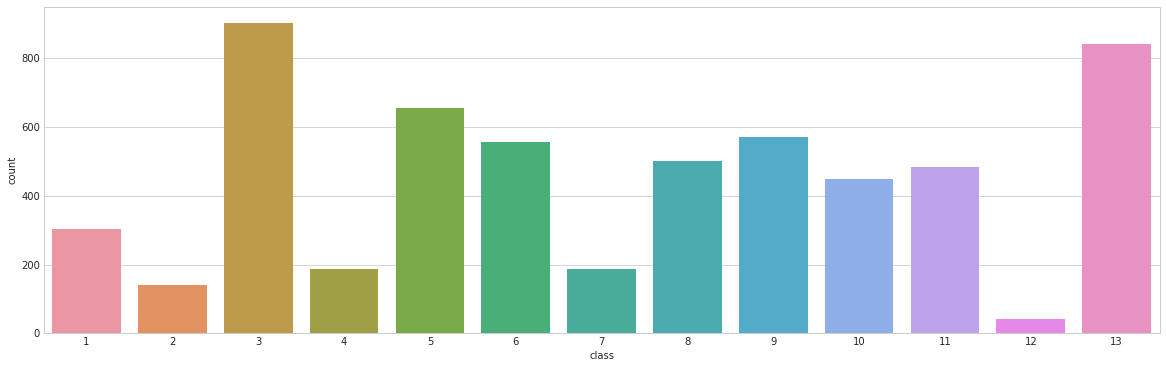

In [5]:
plt.figure(figsize=(20, 6))
sns.countplot(x='class', data=dataset)

Below Graph to see how the rating has been given by student for each questions

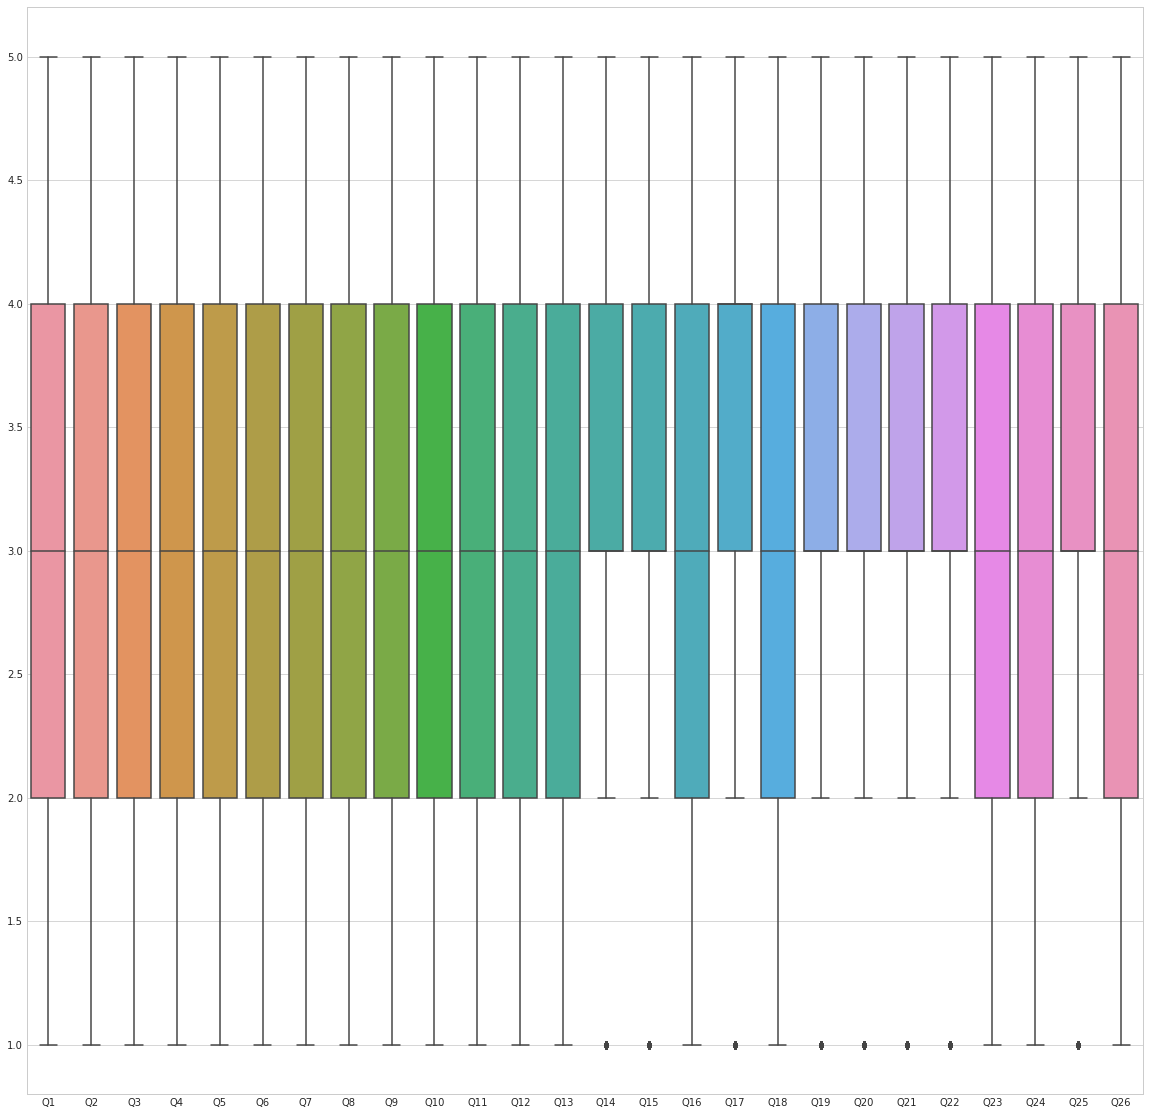

In [6]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=dataset.iloc[:,5:31 ]);



By above graph, we can see that very less students have given completely disagree (Rating 1) for Question Q14, Q15, Q17, Q19 - Q22, Q25

Lets understand the students have reponded for the questions against classes

In [7]:
# Calculate mean for each question response for all the classes.
questionmeans = []
classlist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
for class_num in range(1,13):
    class_data = dataset[(dataset["class"]==class_num)]
    
    questionmeans = []
    classlist = []
    questions = []
    
    for num in range(1,13):
        questions.append(num)
    #Class related questions are from Q1 to Q12
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist += 12 * [class_num] 
    print(classlist)
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
    

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


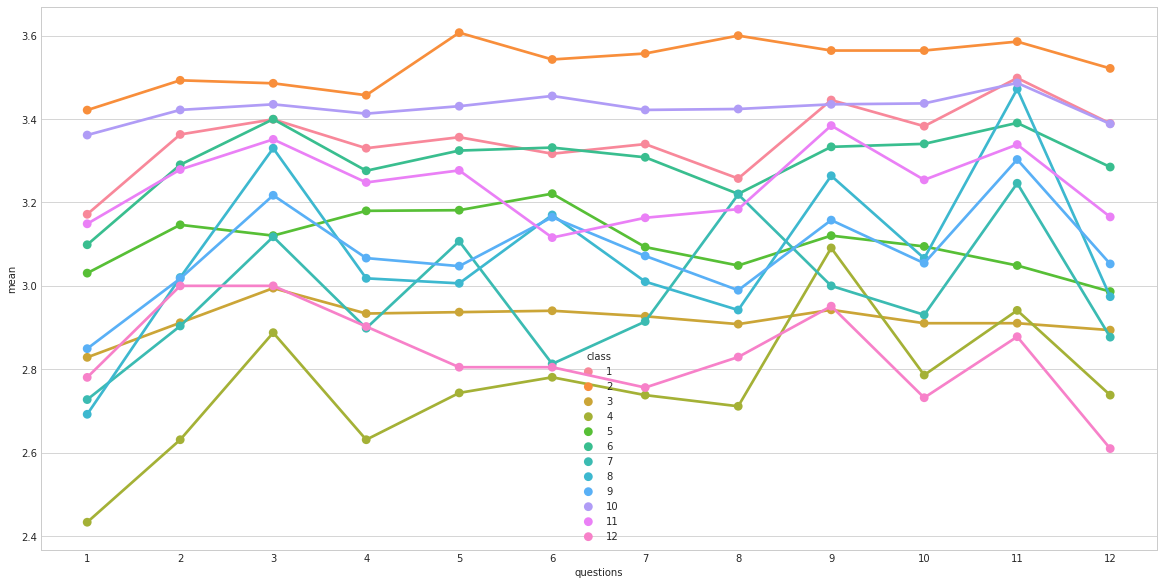

In [8]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")

Above graph shows that we have best ratings from Class 2 and worst rateing from class 4 students

Lets see how rating has been given against instructor wise.


In [9]:
# Calculate mean for each question response for all the classes.
questionmeans = []
inslist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
for ins_num in range(1,4):
    ins_data = dataset[(dataset["instr"]==ins_num)]
    questionmeans = []
    inslist = []
    questions = []
    
    for num in range(13,29):
        questions.append(num)
    
    for col in range(17,33):
        questionmeans.append(ins_data.iloc[:,col].mean())
    inslist += 16 * [ins_num] 
    plotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

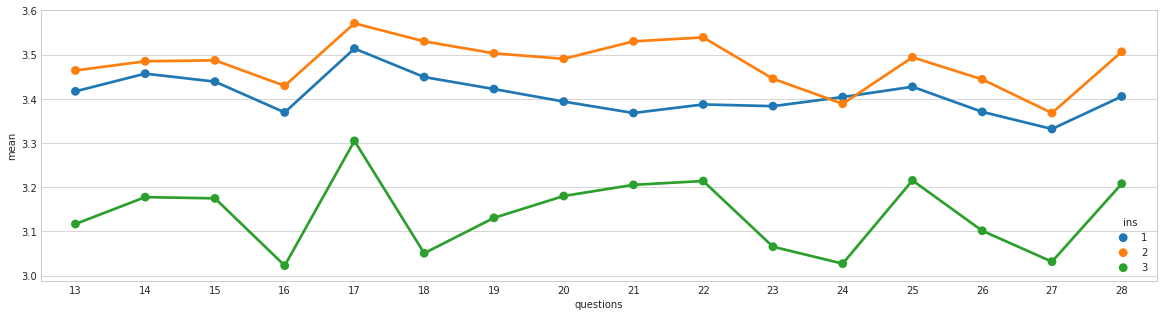

In [10]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="ins")

Based on above graph we can see that According to the Student ratings we see that Instructor 1 and 2 are performing well and got similar rateings but Instructor 3 got less ratings. So we can further explore which course instructor 3 teaches and find out the which course got least ratings.

In [11]:
# Calculate mean for each question response for all the classes for Instructor 3
dataset_inst3 = dataset[(dataset["instr"]==3)]
class_array_for_inst3 = dataset_inst3["class"].unique().tolist()
questionmeans = []
classlist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
for class_num in class_array_for_inst3:
    class_data = dataset_inst3[(dataset_inst3["class"]==class_num)]
    
    questionmeans = []
    classlist = []
    questions = []
    
    for num in range(1,13):
        questions.append(num)
    
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist += 12 * [class_num]
    
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

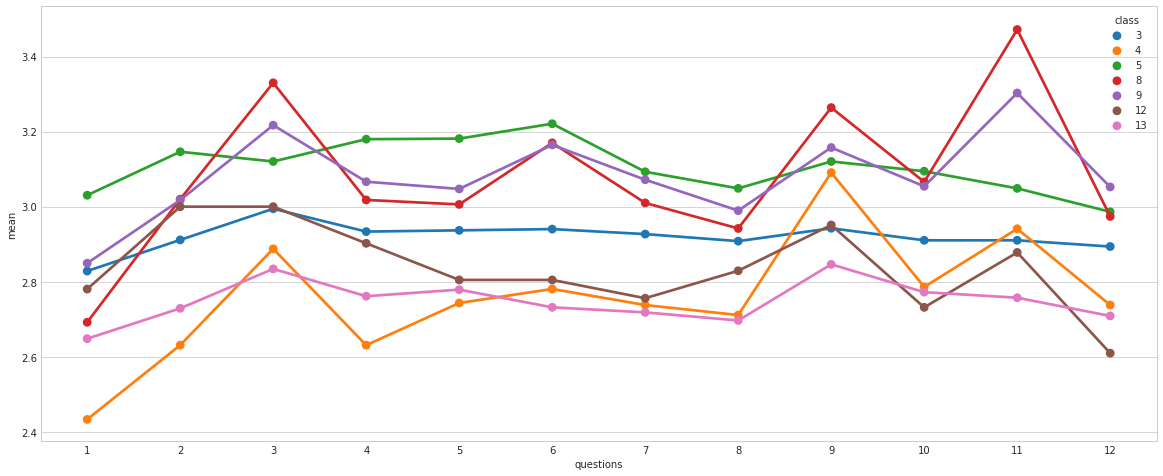

In [12]:
plt.figure(figsize=(20, 8))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")

By above analysis we can recommend the instructor 3 for check on course 4 and 13.

# Lets begin to cluster the students based on the questionaire data

In [13]:
#Lets try to cluster all the students based on the Question responses data.

In [14]:
dataset_questions = dataset.iloc[:,5:33]

In [15]:
dataset_questions.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [16]:
#lets do a PCA for feature dimensional reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
dataset_questions_pca = pca.fit_transform(dataset_questions)


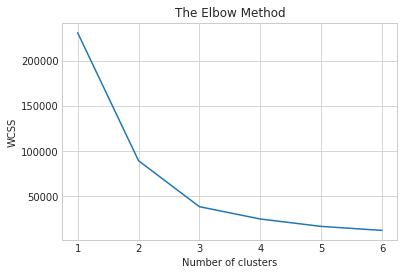

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset_questions_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Based on the Elbow graph , we can go for 3 clusters.

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(dataset_questions_pca)

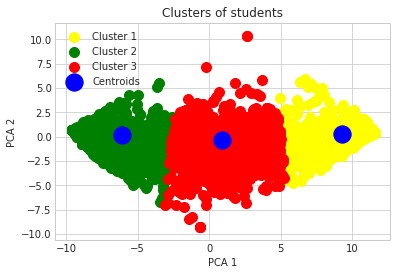

In [19]:
# Visualising the clusters
plt.scatter(dataset_questions_pca[y_kmeans == 0, 0], dataset_questions_pca[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(dataset_questions_pca[y_kmeans == 1, 0], dataset_questions_pca[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(dataset_questions_pca[y_kmeans == 2, 0], dataset_questions_pca[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue', label = 'Centroids')
plt.title('Clusters of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

Looking at the above graph , i see we have 3  clusters of students who have given like Negative, Neutral and Positive feedback

In [20]:
# Let me check the count of students in each cluster
import collections
collections.Counter(y_kmeans)

Counter({0: 1240, 1: 2222, 2: 2358})

So we have 2358 students who have given negative ratings overall , 2222 students with positive ratings and 1240 students with nuetral response 

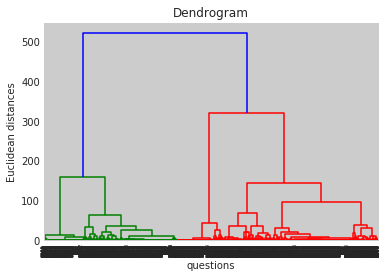

In [21]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dataset_questions_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()


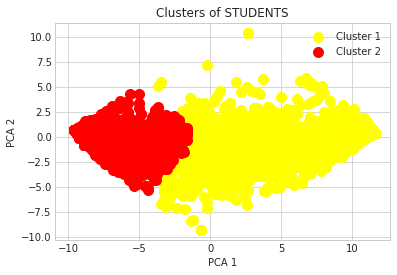

In [22]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(dataset_questions_pca)
X = dataset_questions_pca
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.title('Clusters of STUDENTS')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [23]:
# Let me check the count of students in each cluster
import collections
collections.Counter(y_hc)

Counter({0: 3502, 1: 2318})

If we compare the clusters of Kmeans and Hierarchical process, we can see cluster with red ( Negative is matching approximately)